# Quick way to explore imagery in a directory

In [7]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def PrintFilesInDirectory(in_dir,endstring,brdfDir=True,printList=False,out_dir=None):
    fileList = []
    for f in os.listdir(in_dir):
        if f.endswith(endstring) and 'angles' not in f:
            fileList.append(f)
    filedf = pd.DataFrame(fileList, columns = ['file'])
    
    if brdfDir==True:
        filedf['sensor'] = filedf['file'].str[:4]
        filedf['date'] = np.where((filedf['sensor']=='L1C_'),filedf['file'].str[19:27],filedf['file'].str[17:25])
        filedf['yr'] = filedf['date'].str[:4]
        filedf['yrmo'] = filedf['date'].str[:6]
        sorted_files = filedf.sort_values(by='date')
    
    if printList == True:
        pd.DataFrame.to_csv(filedf, os.path.join(out_dir,'FileList.txt'), sep=',', na_rep='.', index=False)   
        
    return filedf

Can generate a dataframe with a list of all files in folder for quick exploration. Option to print to file for deeper look.
If the directory of interest is a brdf directory, can extract dates and sensor types from file names
useing '.nc' as {endstring} and brdfDir=True. 
Can also generate quick graphs of images by year and month below.

In [3]:
in_dir = "/home/sandbox-cel/paraguay_lc/raster/grids/001010/brdf"
Allimages = PrintFilesInDirectory (in_dir,'.nc',brdfDir=True,printList=False,out_dir=None)

In [4]:
Allimages.head(n=5)

,file,sensor,date,yr,yrmo
0,LC08_L1TP_225079_20210410_20210416_01_T1.nc,LC08,20210410,2021,202104
1,L1C_T21JWL_A013778_20191026T135113_MTD.nc,L1C_,20191026,2019,201910
2,LC08_L1TP_225079_20210731_20210810_01_T1.nc,LC08,20210731,2021,202107
3,LC08_L1TP_225079_20160327_20170327_01_T1.nc,LC08,20160327,2016,201603
4,LC08_L1TP_225079_20170330_20170414_01_T1.nc,LC08,20170330,2017,201703


<AxesSubplot:title={'center':'Images per year'}, xlabel='yr'>

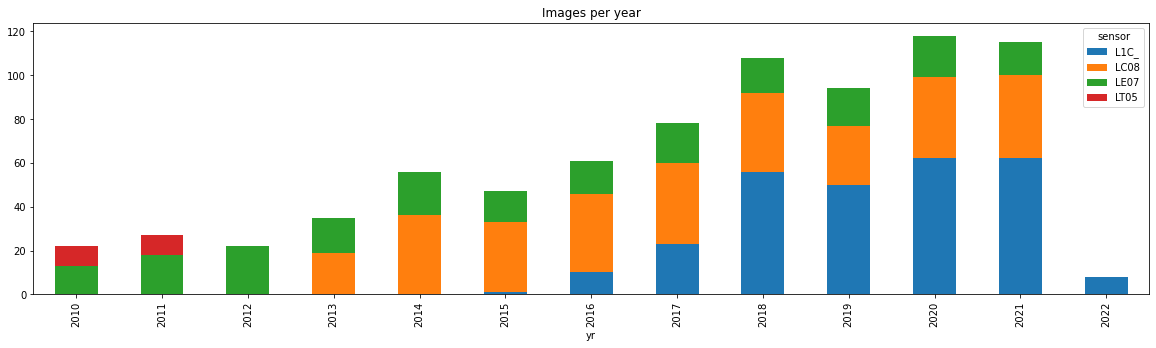

In [39]:
Allimages.groupby(['yr','sensor']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 5), title=('Images per year'))

<AxesSubplot:title={'center':'Images per month'}, xlabel='yrmo'>

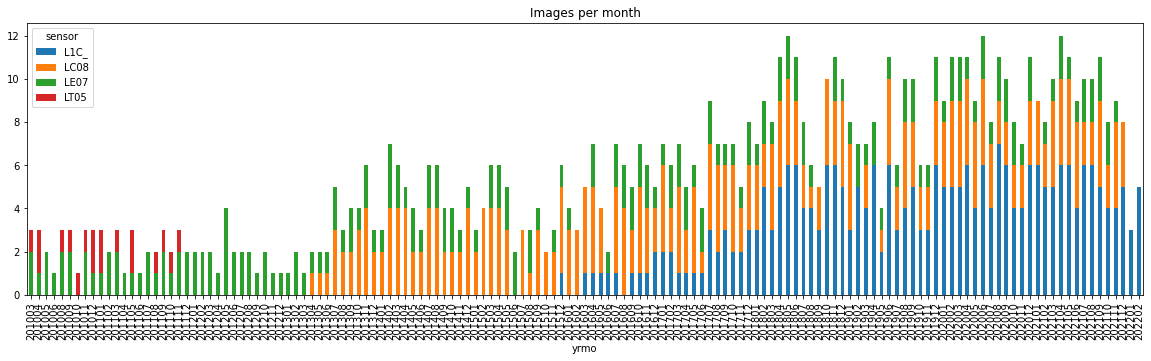

In [41]:
Allimages.groupby(['yrmo','sensor']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 5), title=('Images per month'))

## Focus on smaller range of years to see month on axis:

<AxesSubplot:title={'center':'Images per month'}, xlabel='yrmo'>

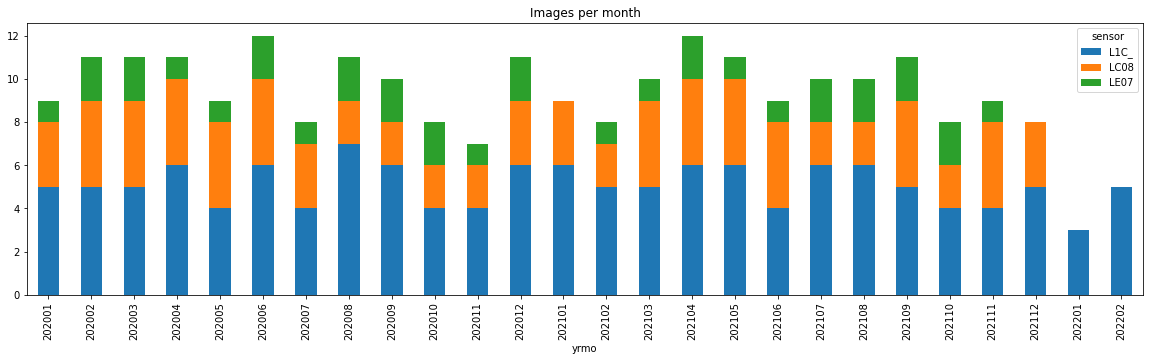

In [44]:
ImgSubset = Allimages[Allimages["yr"].astype(int) > 2019]
ImgSubset.groupby(['yrmo','sensor']).size().unstack().plot(kind='bar', stacked=True, figsize=(20, 5), title=('Images per month'))